In [12]:
import pandas as pd

In [13]:
# Lectura del archivo CSV en un DataFrame de Pandas
df = pd.read_csv(r'C:\Users\rocio\OneDrive\Escritorio\Cuidados_Intensivos\Modelos_Machine_Learning\Modelo2_Prediccion_Mortalidad\df_merge.csv', low_memory=False)

In [14]:
# Cuenta la cantidad de valores nulos en cada fila del DataFrame
null_counts = df.isnull().sum(axis=1)

# Imprime los resultados
print(null_counts)

0         11
1         11
2         11
3         13
4         12
          ..
484857    10
484858    11
484859    11
484860    11
484861    13
Length: 484862, dtype: int64


In [15]:
#Reemplazo los nulos y NaN que quedaron por la media de cada columna
# reemplazar los valores nulos y NaN por cero
df = df.fillna(0)

In [16]:
# Cuenta la cantidad de valores nulos en cada fila del DataFrame
null_counts = df.isnull().sum(axis=1)

# Imprime los resultados
print(null_counts)

0         0
1         0
2         0
3         0
4         0
         ..
484857    0
484858    0
484859    0
484860    0
484861    0
Length: 484862, dtype: int64


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pickle

# Definir la variable objetivo 'sepsis'
df['sepsis'] =  ((df['ritmo_respiratorio'] > 100) & (df['plaquetas'] <20) & (df['bilirrubina'] > 12) & (df['PAM'] < 70) & (df['GCS'] < 6) & (df['creatinina'] > 5) & (df['pO2'] < 200) & (df['charlson_puntaje'] > 3)) 
  

# Seleccionar los signos vitales relevantes
X = df[['ritmo_cardiaco', 'plaquetas', 'bilirrubina', 'PAM', 'GCS', 'creatinina', 'pO2', 'charlson_puntaje']]
y = df['sepsis']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluar el modelo
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Train score: {train_score:.3f}, Test score: {test_score:.3f}')
# Guardar el modelo entrenado
with open("prediccion_mortalidad.pkl", "wb") as f:
    pickle.dump(model, f)

Train score: 1.000, Test score: 1.000


In [18]:
from sklearn.metrics import accuracy_score

In [19]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [20]:
from sklearn.metrics import recall_score

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.0


c:\Users\rocio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.metrics import confusion_matrix

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[96973]]


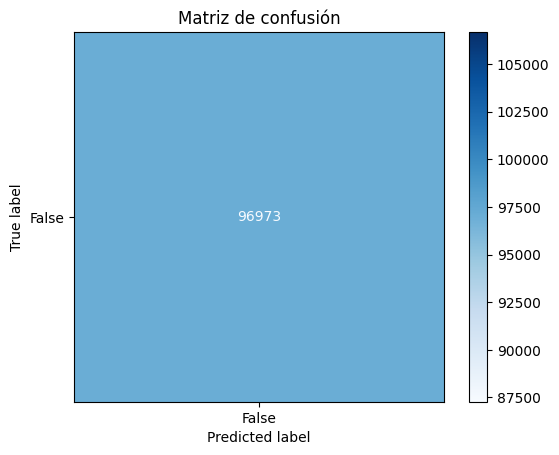

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
disp.ax_.set_title("Matriz de confusión")
plt.show()

In [23]:
# Crear un conjunto de características con los signos vitales del paciente
paciente = [[1, 1, 20, 10, 5, 5, 5, 6]]

# Obtener la predicción del modelo
prediccion = model.predict(paciente)

# Imprimir la predicción
print("El paciente tiene una taza de mortalidad de 10-14%" if prediccion == 1 else "El paciente tiene una taza de mortalidad de 28% ")

El paciente tiene una taza de mortalidad de 28% 


c:\Users\rocio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [25]:
import pandas as pd
import pickle
import gradio as gr

# Cargar el modelo desde un archivo
with open('prediccion_mortalidad.pkl', 'rb') as archivo:
    modelo = pickle.load(archivo)

def predict_sepsis(ritmo_cardiaco, plaquetas, bilirrubina, PAM, GCS, creatinina, pO2, charlson_puntaje ):
    """
    Esta función clasifica si un paciente tiene una taza de mortalidad elevada o bajo, en base a los valores
    de sus signos vitales: ritmo cardíaco, GCS y PAS, etc  y el índice de Charlson.
    
    Args:
    - ritmo_cardiaco (float): Ritmo cardíaco del paciente.
    - GCS (float): Escala de Coma de Glasgow (GCS, por sus siglas en inglés) del paciente.
    - PAS (float): Presión arterial sistólica (PAS) del paciente.
    -etc
    
    Returns:
    - str: Cadena que indica si el paciente tiene una bajo o alto nivel de mortalidad.
    """
    # Crear un DataFrame con los valores de los signos vitales
    data = pd.DataFrame({"ritmo_cardiaco": [ritmo_cardiaco],
                         "plaquetas":[plaquetas],
                         "bilirrubina":[bilirrubina],
                         "PAM":[PAM],
                         "GCS": [GCS],
                         "creatinina":[creatinina],
                         "pO2": [pO2],
                         "charlson_puntaje": [charlson_puntaje]})
    
    # Hacer la predicción de sepsis
    pred = modelo.predict(data)[0]
    
    # Retornar la cadena correspondiente
    if pred == 0:
        return "El paciente tiene una taza de mortalidad de 10-14%"
    else:
        return "El paciente tiene una taza de mortalidad de 28%"

# Crear la interfaz de Gradio
inputs = [gr.inputs.Number(label="ritmo_cardiaco"),
          gr.inputs.Number(label="plaquetas"),
          gr.inputs.Number(label="bilirrubina"),
          gr.inputs.Number(label="PAM"),
          gr.inputs.Number(label="GCS"),
          gr.inputs.Number(label="creatinina"),
          gr.inputs.Number(label="pO2"),
          gr.inputs.Number(label="charlson_puntaje")]
output = gr.outputs.Textbox(label="Mortalidad")

gr.Interface(fn=predict_sepsis, inputs=inputs, outputs=output).launch()

c:\Users\rocio\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\rocio\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\rocio\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
